**<p style="font-size: 15px;">1.	Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas.</p>**
**<p style="font-size: 16px;">Seja criativo!</p>**

In [2]:
# Performing exploratory data analysis

In [340]:
# importing all libraries that will be used

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# read your file
movies_df = pd.read_csv('desafio_indicium_imdb.csv')

In [5]:
# drop duplicated observations
movies_df = movies_df.drop_duplicates()

In [6]:
# checking the dataset by printing the first 5 rows
movies_df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [7]:
# checking the data types for each column 
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [8]:
# the Gross column should not be an object, as it represents the gross income from the movie (probably in USD)
# it needs to be changed to a floating point data type

In [9]:
# replacing the commas to empty strings
movies_df['Gross'] = movies_df['Gross'].str.replace(',','')

In [10]:
# then converting the Gross column to float type
movies_df['Gross'] = movies_df['Gross'].astype(float)

In [11]:
# checking the df again
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(3), int64(2), object(11)
memory usage: 125.0+ KB


In [12]:
# checking the amount of missing values 
movies_df.isna().sum().sort_values()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Runtime            0
IMDB_Rating        0
Genre              0
Overview           0
Director           0
No_of_Votes        0
Star1              0
Star2              0
Star3              0
Star4              0
Certificate      101
Meta_score       157
Gross            169
dtype: int64

In [13]:
# columns with missing data:
# Certificate; Meta_score; Gross
# checking if they represent 5% or less of total values 
# by calculating the missing values threshold, which is the length of movie_df multiplied by 5%
threshold = len(movies_df)*0.05
threshold

49.95

In [14]:
# threshold = 49.95
# therefore it's not possible to just delete missing values from the columns
# another possible approach: imputation
# let's check the columns to see how to tackle this problem individually
# using genre to fill the missing values for certificate? (i.e. horror movies won't be for children)

In [15]:
# number of unique genres is 202
movies_df['Genre'].nunique()

202

In [16]:
# we can decrease the number of unique genres by creating a new column containing only one genre per movie
# this new column will take only the first genre specified in each row of the Genre column
# the first genre will then be considered as the main genre of the movie and it will be assigned to the new Main_Genre column

In [17]:
movies_df['Main_Genre'] = movies_df['Genre'].str.split(',').str[0]

In [18]:
# number o unique Main_Genre is now 14
movies_df['Main_Genre'].nunique()

14

In [19]:
movies_df['Main_Genre'].value_counts()

Main_Genre
Drama        288
Action       172
Comedy       155
Crime        107
Biography     88
Animation     82
Adventure     72
Mystery       12
Horror        11
Western        4
Film-Noir      3
Fantasy        2
Family         2
Thriller       1
Name: count, dtype: int64

In [20]:
#############################

In [21]:
# impute missing values to Certificate column by first filtering specific words from the Overview column
# the reasoning behind this is that the certificate of movies is assigned by considering the movie's content
# such as violence, sex, drug use, language, etc
# therefore, I set keywords such as: murder|suicide|vengeance|crime
# and applied a filter, if the observation in Overview column has any of those words, then its Certificate will be set to A = Adult
# the filter was performed by using .str.contains method; case = False because I don't want lower and uppercases to be considered

In [22]:
movies_df.loc[(movies_df["Certificate"].isnull()) & (movies_df["Overview"].str.contains("murder|suicide|vengeance|crime",case=False)), "Certificate"] = "A"

In [23]:
# certificate has now 89 missing values
movies_df.isna().sum().sort_values()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Runtime            0
IMDB_Rating        0
Genre              0
Overview           0
Director           0
No_of_Votes        0
Star1              0
Star2              0
Star3              0
Star4              0
Main_Genre         0
Certificate       89
Meta_score       157
Gross            169
dtype: int64

In [24]:
# I then grouped Certificate by their Main_Genre
# and imputed the missing values using the mode() to get the most frequent Certificate values for each Main_Genre

In [25]:
group_modes = movies_df.groupby('Main_Genre')['Certificate'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

In [26]:
movies_df['Certificate'] = movies_df['Certificate'].fillna(group_modes)

In [27]:
movies_df.isna().sum().sort_values()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Runtime            0
IMDB_Rating        0
Genre              0
Overview           0
Director           0
No_of_Votes        0
Star1              0
Star2              0
Star3              0
Star4              0
Main_Genre         0
Certificate        1
Meta_score       157
Gross            169
dtype: int64

In [28]:
############################################

In [29]:
# dealing with missing values from Meta_score column:
# approach chosen: replace missing values by the Meta_score median values

In [30]:
median_meta_score = movies_df['Meta_score'].median()
movies_df['Meta_score'] = movies_df['Meta_score'].fillna(median_meta_score)

In [31]:
movies_df.isna().sum().sort_values()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Runtime            0
IMDB_Rating        0
Genre              0
Overview           0
Meta_score         0
Star3              0
Director           0
Star1              0
Star2              0
No_of_Votes        0
Star4              0
Main_Genre         0
Certificate        1
Gross            169
dtype: int64

In [32]:
#############################################

In [33]:
# dealing with missing values from Gross column:
# set number of votes to a new categoric column named Voted_Category;
# set the new categories based on quantile cuts -> less_voted, intermediate_voted, most_voted;
# then group by the Gross column and impute the median of gross income based on the voted category.

# the reasoning behind this approach is that the most watched movies earned more money
# if more people voted for a movie is likely that more people watched that movie, than a movie with less votes

<Axes: xlabel='Gross', ylabel='No_of_Votes'>

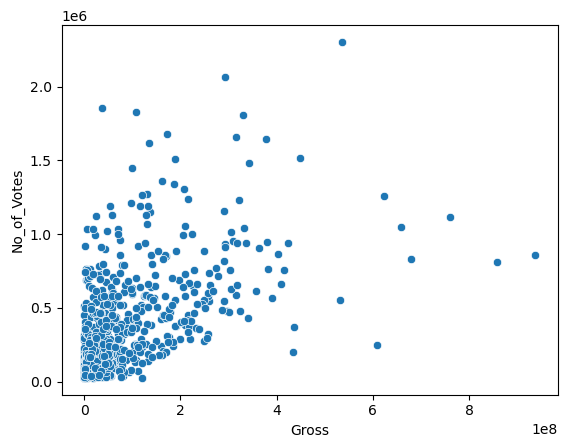

In [34]:
sns.scatterplot(data = movies_df, x = 'Gross', y = 'No_of_Votes')

In [35]:
cor_gross_votes = movies_df['Gross'].corr(movies_df['No_of_Votes'])
print(f"Correlation between Gross Income and Number of Votes: {cor_gross_votes}")

Correlation between Gross Income and Number of Votes: 0.5895274415299169


In [36]:
# splitting the categories using pd.qcut fuction and specifying the number of quantiles to three by setting q=3
movies_df['Voted_Category'] = pd.qcut(movies_df['No_of_Votes'], q=3, labels=['less_voted', 'intermediate_voted', 'highly_voted'])

In [37]:
movies_df['Gross'] = movies_df.groupby('Voted_Category', observed = False)['Gross'].transform(lambda x: x.fillna(x.median()))

In [38]:
# now gross column has no missing values anymore
# certificate column is the only one that still has missing values
movies_df.isna().sum().sort_values()

Unnamed: 0        0
Series_Title      0
Released_Year     0
Runtime           0
IMDB_Rating       0
Genre             0
Overview          0
Meta_score        0
Star3             0
Director          0
Star1             0
Star2             0
No_of_Votes       0
Star4             0
Gross             0
Main_Genre        0
Voted_Category    0
Certificate       1
dtype: int64

In [39]:
# Certificate column still has one missing value
# but now it is possible to just erase that row since it represents <= 5% of the data
movies_df = movies_df.dropna()

In [40]:
# dataset has now 998 rows
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      998 non-null    int64   
 1   Series_Title    998 non-null    object  
 2   Released_Year   998 non-null    object  
 3   Certificate     998 non-null    object  
 4   Runtime         998 non-null    object  
 5   Genre           998 non-null    object  
 6   IMDB_Rating     998 non-null    float64 
 7   Overview        998 non-null    object  
 8   Meta_score      998 non-null    float64 
 9   Director        998 non-null    object  
 10  Star1           998 non-null    object  
 11  Star2           998 non-null    object  
 12  Star3           998 non-null    object  
 13  Star4           998 non-null    object  
 14  No_of_Votes     998 non-null    int64   
 15  Gross           998 non-null    float64 
 16  Main_Genre      998 non-null    object  
 17  Voted_Category  998 n

In [41]:
###############################################################################################

**Looking at the data and generating hypotheses**

In [341]:
# the first question that comes to mind is:
# is there a trend between genre of the movie and gross income?

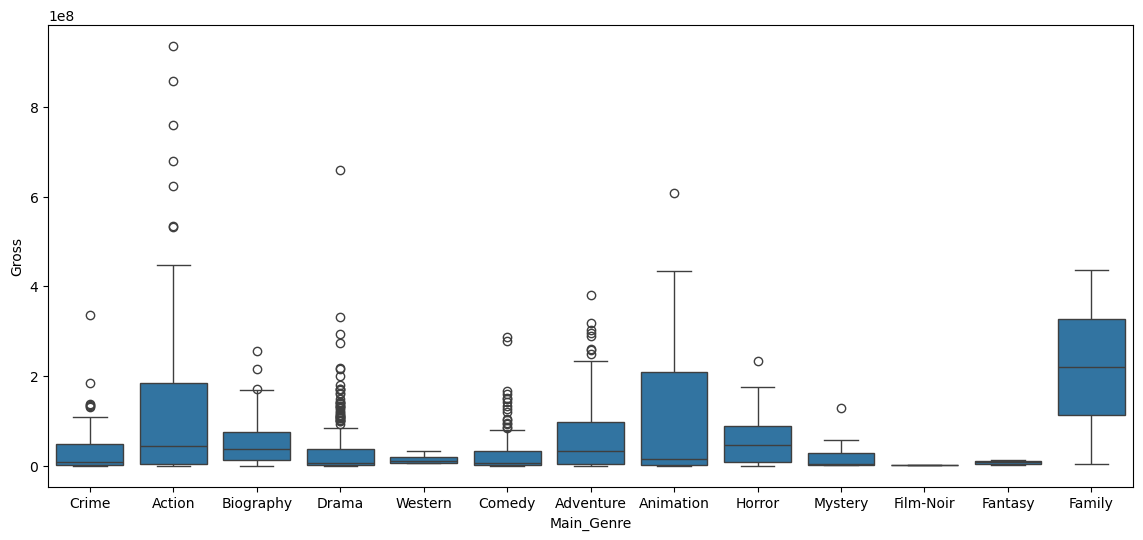

In [43]:
# plotting a boxplot of Main_Genre and Gross columns
plt.figure(figsize=(14,6))
sns.boxplot(data = movies_df, x = 'Main_Genre', y = 'Gross')
plt.show()

In [44]:
print(movies_df['Released_Year'].min())

1920


In [342]:
# although it is interesting to look at the whole dataset, there are movies in this dataset that were released in 1920.
# in order to get a better idea of current trends, I decided to subset the dataset and look at more recent movies.
# more specifically, movies that were released after 2000 up to the most current ones (released in 2020)

# then I decided to ask again the same question:
# is there a trend between genre of the movie and gross income?

# in addition, by splitting the Released_Year column into categories: 2001-2005; 2006-2010; 2011-2015; 2016-2020
# is it possible to see if a specific genre is outperforming the others along the years?

# is there a trend between movie certificate and gross income?
# i.e. movies for a broader range of audience usually have a higher gross income

# also, during data analysis it is not usually best practice to focus on outliers;
# however, for this especific dataset, the upper outliers could be interesting to look at.
# the reasoning behind this idea is that our client PProductions is looking to produce a new hit;
# thus, looking at the group of highest gross income movies we could assess if there is a trend among them
# for instance: do they belong to a specific genre? are they franchise movies or sequels?
# is there any common feature among them that made them outperform all the others?



In [46]:
# first, lets subset the data to get only movies released after 2001

In [47]:
# the Released_Year column is current an object column
movies_df['Released_Year'].value_counts()

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1920     1
1930     1
1922     1
1943     1
PG       1
Name: count, Length: 100, dtype: int64

In [48]:
# removing this odd observation
movies_df = movies_df[movies_df['Released_Year'] != 'PG']

In [49]:
# setting the column to datatype integer
movies_df['Released_Year'] = movies_df['Released_Year'].astype(int)

In [50]:
# the dataset now has 997 observations
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 998
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      997 non-null    int64   
 1   Series_Title    997 non-null    object  
 2   Released_Year   997 non-null    int64   
 3   Certificate     997 non-null    object  
 4   Runtime         997 non-null    object  
 5   Genre           997 non-null    object  
 6   IMDB_Rating     997 non-null    float64 
 7   Overview        997 non-null    object  
 8   Meta_score      997 non-null    float64 
 9   Director        997 non-null    object  
 10  Star1           997 non-null    object  
 11  Star2           997 non-null    object  
 12  Star3           997 non-null    object  
 13  Star4           997 non-null    object  
 14  No_of_Votes     997 non-null    int64   
 15  Gross           997 non-null    float64 
 16  Main_Genre      997 non-null    object  
 17  Voted_Category  997 n

In [51]:
# getting the subset
current_movies = movies_df[movies_df['Released_Year'] > 2000]

In [52]:
print(current_movies['Released_Year'].min())
print(current_movies['Released_Year'].max())

2001
2020


In [53]:
# new dataset has 466 observations
current_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 1 to 950
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      466 non-null    int64   
 1   Series_Title    466 non-null    object  
 2   Released_Year   466 non-null    int64   
 3   Certificate     466 non-null    object  
 4   Runtime         466 non-null    object  
 5   Genre           466 non-null    object  
 6   IMDB_Rating     466 non-null    float64 
 7   Overview        466 non-null    object  
 8   Meta_score      466 non-null    float64 
 9   Director        466 non-null    object  
 10  Star1           466 non-null    object  
 11  Star2           466 non-null    object  
 12  Star3           466 non-null    object  
 13  Star4           466 non-null    object  
 14  No_of_Votes     466 non-null    int64   
 15  Gross           466 non-null    float64 
 16  Main_Genre      466 non-null    object  
 17  Voted_Category  466 n

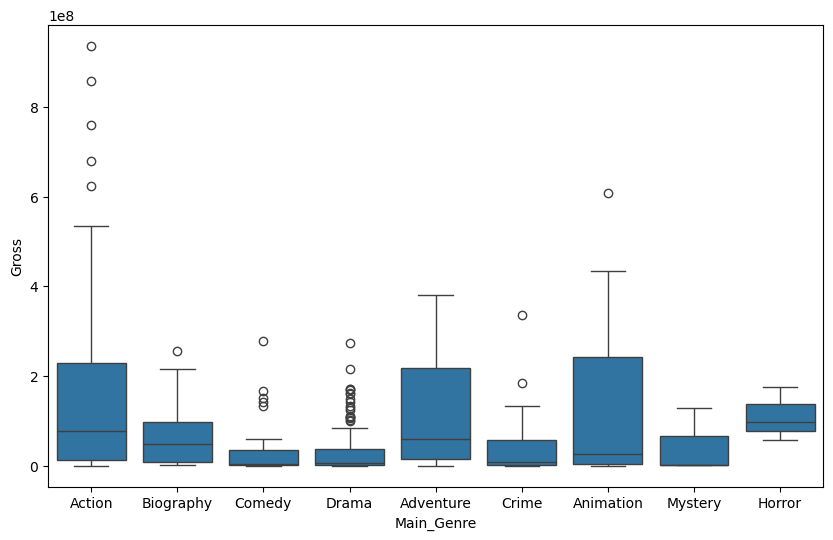

In [54]:
# plotting a boxplot from Main_Genre and Gross columns to see if there is any trend

# by removing the oldest movies even the amount of Main_Genre categories decreased
# which corroborates with the idea that retaining older movies could outdate our analysis
plt.figure(figsize=(10,6))
sns.boxplot(data = current_movies, x = 'Main_Genre', y = 'Gross')
plt.show()

In [55]:
# despite the fact that we cannot say there is a statistical difference among the different genres, 
# we can observe that action movies have the highest maximum values of gross income;
# and looking at its outliers, we can see that the movies that had the highest gross income of the entire dataset are all action movies

In [56]:
#################################################

In [57]:
# splitting the values from the Released_Year column into different categories
# 2001-2005 / 2006-2010 / 2011-2015 / 2016-2020

In [58]:
current_movies['Year_Category'] = pd.cut(current_movies['Released_Year'], bins=4, labels=['2001-2005','2006-2010','2011-2015','2016-2020'])

C:\Users\Rafaela\AppData\Local\Temp\ipykernel_14748\2198939164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_movies['Year_Category'] = pd.cut(current_movies['Released_Year'], bins=4, labels=['2001-2005','2006-2010','2011-2015','2016-2020'])


In [59]:
# checking to see if it worked
current_movies.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Main_Genre,Voted_Category,Year_Category
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action,highly_voted,2006-2010
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,Action,highly_voted,2001-2005
7,8,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0,Action,highly_voted,2006-2010
9,10,The Lord of the Rings: The Fellowship of the Ring,2001,U,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544750.0,Action,highly_voted,2001-2005
12,13,The Lord of the Rings: The Two Towers,2002,UA,179 min,"Action, Adventure, Drama",8.7,While Frodo and Sam edge closer to Mordor with...,87.0,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1485555,342551365.0,Action,highly_voted,2001-2005


<Axes: xlabel='Year_Category', ylabel='Gross'>

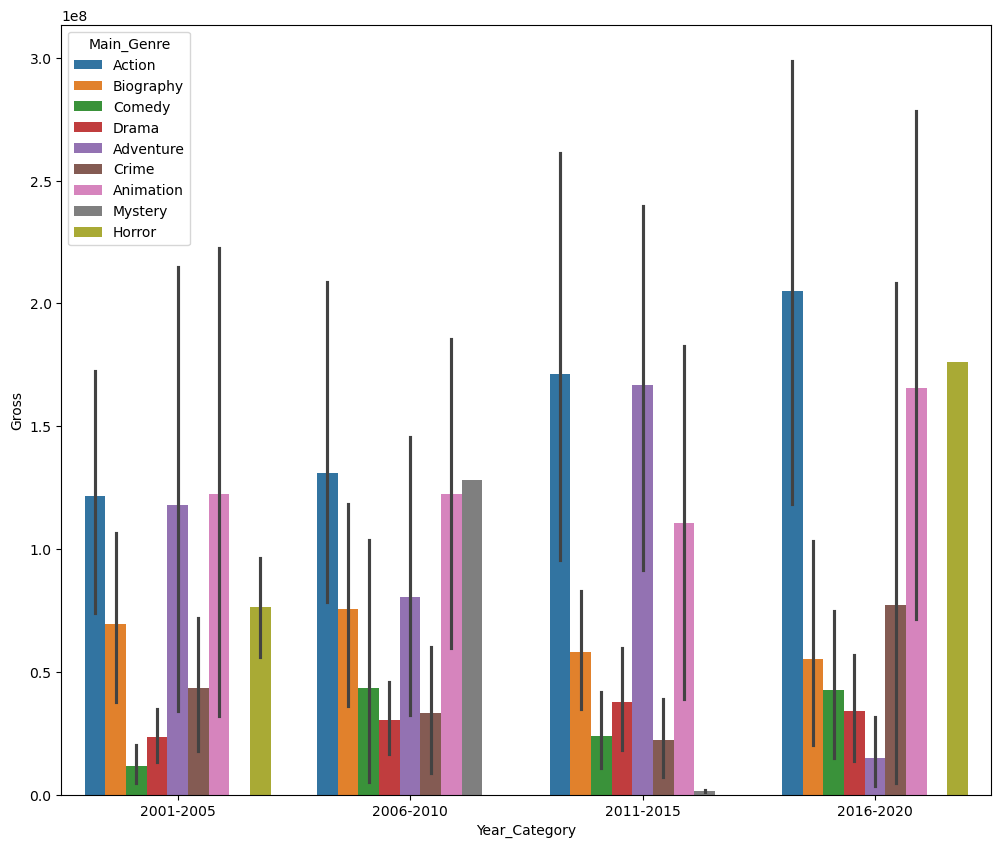

In [60]:
# plotting a bar plot to observe trends between the gross income of different genres within different time periods
# using the columns Gross, Year_Category and setting the Main_Genre as the hue of the plot
plt.figure(figsize=(12, 10))
sns.barplot(data=current_movies, y = 'Gross', x = "Year_Category", hue = "Main_Genre")

In [343]:
# again, we cannot say there is a statistical difference among genres in the sampled time periods.
# but we can observe an increasing trend of gross income for action movies along the years
# besides that, animation movies performed well and remained with consistently high gross income for the first three time periods, 
# having increased for the period of 2016-2020

In [344]:
# footnote: horror movie 'Get Out' released in 2017 had a gross income higher than the average of all animation movies 
# released in the 2016-2020 time period, amounting to US$ 176 040 665	

In [ ]:
##############################################

In [335]:
# another question we could ask is that the age classification of the movies are somewhat correlated with gross income
# for instance, is there a particular certification that has a higher gross income?
# perhaps movies that have no age restriction have higher revenues, since they encompass a broader range of public

In [336]:
# to answer this question I first am going to decrease the number of certification classes
category_age = {
        'U': 'U',
        'G': 'U',
        'UA': 'UA',
        'PG-13': 'UA',
        'U/A': 'UA',
        'TV-14': 'UA',
        'A': 'A',
        'R': 'A',
        '16': 'A',
        'TV-MA': 'A',
        'PG': 'PG',
        'TV-PG': 'PG',
        'Unrated': 'Unrated'
    }

In [337]:
current_movies['Age_Category'] = current_movies['Certificate'].map(category_age)

C:\Users\Rafaela\AppData\Local\Temp\ipykernel_14748\1011727165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_movies['Age_Category'] = current_movies['Certificate'].map(category_age)


In [338]:
current_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 1 to 950
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      466 non-null    int64   
 1   Series_Title    466 non-null    object  
 2   Released_Year   466 non-null    int64   
 3   Certificate     466 non-null    object  
 4   Runtime         466 non-null    object  
 5   Genre           466 non-null    object  
 6   IMDB_Rating     466 non-null    float64 
 7   Overview        466 non-null    object  
 8   Meta_score      466 non-null    float64 
 9   Director        466 non-null    object  
 10  Star1           466 non-null    object  
 11  Star2           466 non-null    object  
 12  Star3           466 non-null    object  
 13  Star4           466 non-null    object  
 14  No_of_Votes     466 non-null    int64   
 15  Gross           466 non-null    float64 
 16  Main_Genre      466 non-null    object  
 17  Voted_Category  466 n

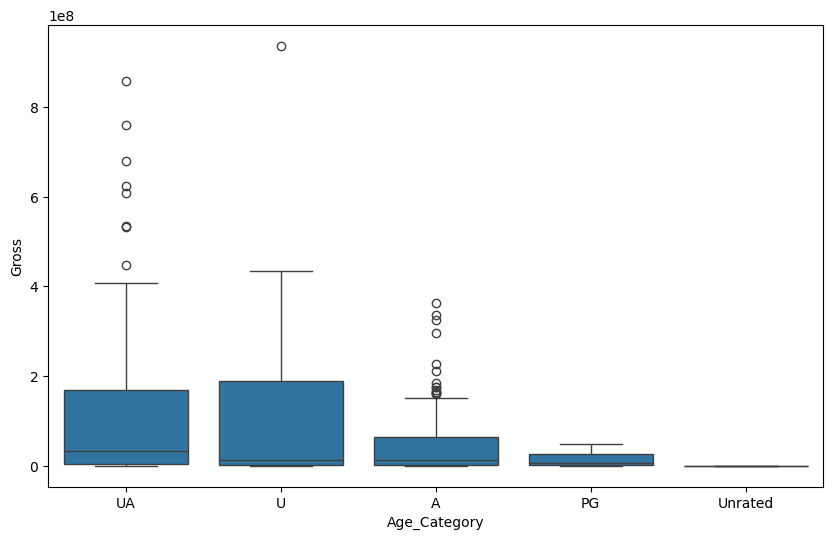

In [339]:
plt.figure(figsize=(10,6))
sns.boxplot(data = current_movies, x = 'Age_Category', y = 'Gross')
plt.show()

In [ ]:
# we can see that both the certifications U (unrestricted) and UA (unrestricted with adult presence) do have the major
# gross income of our current movies dataset (from 2001 to 2020), showing that movies made for a wider range of public
# can outperform those ones that are very restricted (i.e. just for adults)


In [63]:
##############################################

In [64]:
# identifying outliers
# in this case, to identify the movies that had the highest gross income from 2001 to 2020
# using the interquartile range (IQR) to identify outlier
# IQR = 75th - 25th percentile
# upper outliers > 75th percentile + (1.5*IQR)
# lower outliers < 25th percentile - (1.5*IQR)

In [65]:
# calculating the 75th percentile
seventy_fifth = current_movies['Gross'].quantile(0.75)

In [66]:
# calculating the 25th percentile
twenty_fifth = current_movies['Gross'].quantile(0.25)

In [67]:
# calculating IQR for the Gross column
gross_iqr = seventy_fifth - twenty_fifth

In [68]:
# finding the threshold for the upper limit
# for this analysis I only want the upper outliers
upper = seventy_fifth + (1.5*gross_iqr)

In [69]:
upper

np.float64(266733375.875)

In [70]:
mov_out = current_movies[current_movies['Gross'] >= upper]

In [71]:
# the dataset has 39 observatios above or equal to the upper outlier threshold for Gross column
mov_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 1 to 946
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      39 non-null     int64   
 1   Series_Title    39 non-null     object  
 2   Released_Year   39 non-null     int64   
 3   Certificate     39 non-null     object  
 4   Runtime         39 non-null     object  
 5   Genre           39 non-null     object  
 6   IMDB_Rating     39 non-null     float64 
 7   Overview        39 non-null     object  
 8   Meta_score      39 non-null     float64 
 9   Director        39 non-null     object  
 10  Star1           39 non-null     object  
 11  Star2           39 non-null     object  
 12  Star3           39 non-null     object  
 13  Star4           39 non-null     object  
 14  No_of_Votes     39 non-null     int64   
 15  Gross           39 non-null     float64 
 16  Main_Genre      39 non-null     object  
 17  Voted_Category  39 non

In [72]:
mov_out.head(39).sort_values('Gross', ascending = False)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Main_Genre,Voted_Category,Year_Category
476,477,Star Wars: Episode VII - The Force Awakens,2015,U,138 min,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0,Action,highly_voted,2011-2015
58,59,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0,Action,highly_voted,2016-2020
622,623,Avatar,2009,UA,162 min,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0,Action,highly_voted,2006-2010
59,60,Avengers: Infinity War,2018,UA,149 min,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0,Action,highly_voted,2016-2020
356,357,The Avengers,2012,UA,143 min,"Action, Adventure, Sci-Fi",8.0,Earth's mightiest heroes must come together an...,69.0,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,1260806,623279547.0,Action,highly_voted,2011-2015
890,891,Incredibles 2,2018,UA,118 min,"Animation, Action, Adventure",7.6,The Incredibles family takes on a new mission ...,80.0,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,608581744.0,Animation,intermediate_voted,2016-2020
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action,highly_voted,2006-2010
581,582,Rogue One,2016,UA,133 min,"Action, Adventure, Sci-Fi",7.8,The daughter of an Imperial scientist joins th...,65.0,Gareth Edwards,Felicity Jones,Diego Luna,Alan Tudyk,Donnie Yen,556608,532177324.0,Action,highly_voted,2016-2020
62,63,The Dark Knight Rises,2012,UA,164 min,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099.0,Action,highly_voted,2011-2015
595,596,Toy Story 4,2019,U,100 min,"Animation, Adventure, Comedy",7.8,"When a new toy called ""Forky"" joins Woody and ...",84.0,Josh Cooley,Tom Hanks,Tim Allen,Annie Potts,Tony Hale,203177,434038008.0,Animation,intermediate_voted,2016-2020


In [345]:
# checking the dataset from the outliers we can see that most of them are franchises (i.e 20 out of 39)
# from those twenty franchise movies, 10 belong to the Marvel Cinematic Universe
# the remaining 19 movies mainly belong to the animation genre and/or are sequels

# in addition, animation movies in general attract public from all ages, not just kids and their relatives, plus,
# they also have their own franchises and sequels; this helps to explain why it is a genre that kept its gross income high
# throughout the years and in the most recent time period (2011-2020), it has increased in gross income when compared with previous years
# the dataset does not contain information of movies released after 2020, it could be interesting to check if both action and animation genres
# continue with an increasing gross income trend

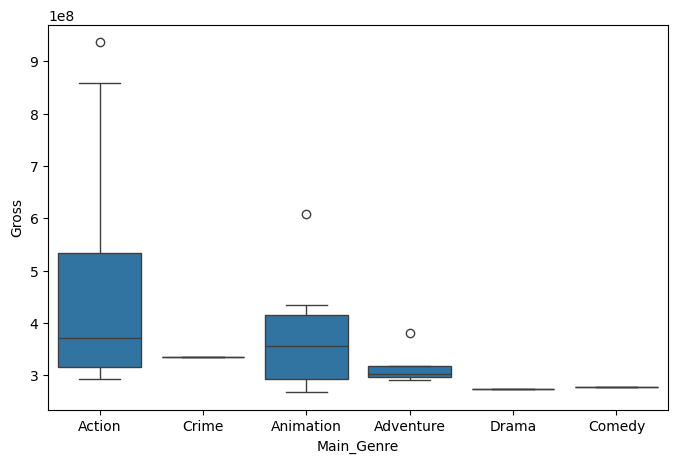

In [74]:
# plotting a boxplot with the outlier dataset 
plt.figure(figsize=(8,5))
sns.boxplot(data = mov_out, x = 'Main_Genre', y = 'Gross')
plt.show()

In [346]:
# the boxplot shows that the "big hits" come mainly from the genre action, followed by animation

**<p style="font-size: 15px;">Summing up data analysis </p>**

<p style="font-size: 14px;">After carefully analysing the data, I would recommend investing in the production of Action or Animation movies. But mainly in Action movies, because although the Animation genre seems to be increasing its revenue, historically the movies that achieved the highest gross income were from the Action genre, especially when belonging to a franchise or to a sequel. In addition, age classification (i.e. Certificate) also seems to play a role in gross income, with unrestricted movies outperforming movies with age restriction. Thus, focusing on such movies would be a good approach. In addition, it would be interesting to cross this dataset with a dataset containing the net income (or profit) of the movies, for instance, although Action movies usually have a high gross income, this type of movie usually costs a lot of money to be produced. Therefore, oftentimes its profit may not be as high as one would imagine. That being the case, perhaps the outcome of this analysis could be different. Another valid point to consider when choosing a film to produce is that movies with great scripts and made by renowned actors/actresses and directors can achieve a substantial gross income despite its genre and age classification. One example taken from the available dataset is the movie 'Get Out', which is an horror movie released in 2017 that alone had a higher gross income than the average for all Animation movies released in the same period (2016-2020).</p>

**<p style="font-size: 15px;">2.	Responda também às seguintes perguntas:</p>**

**a.	Qual filme você recomendaria para uma pessoa que você não conhece?**

<p style="font-size: 14px;">I would recommend an Action or an Animation movie, because looking at the dataset these two genres seem to be the most popular ones, meaning that they are generally more appealing to the general public.</p> 

**b.	Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?** 

<p style="font-size: 14px;">Looking at the available dataset, the genre of the movie seems to be the most correlated variable with the gross income, while both the weighted average of all reviews (meta_score column) and the IMDb rating did not show a correlation with it. The classification of movies also seem to play a role in gross income, with movies from Unrestricted (U) and Unrestricted with parental guidance (UA) outperforming the other classifications. In addition, taking a closer look at the movies with the highest revenues, most of them belong to a franchise of are sequel movies. For instance, in our dataset, those movies mainly belong to the Marvel Cinematic Universe, the Harry Potter franchise, and the Lord of the Rings trilogy. The success of these movies could be related with the familiarity of the characters, i.e. the audience tends to get more involved with characters they already know. 
Additionally, other factors that play a role in the expectation of high revenues are the quality of the script and the presence of renowned actors and directors.</p>

**c.	Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

<p style="font-size: 14px;">The Overview column can help to infer the genre of a specific movie, especially when considering a multi-lable genre classification, that is, when the same movie is assigned to more than one genre, and this could be done by analysing keywords. In addition, the Overview column could also help to assign the age classification of movies. </p>

**<p style="font-size: 15px;">3.	Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?</p>**

<p style="font-size: 14px;">I used a regression type of supervised machine learning, which focuses on predicting continuous variables, which is the case for the IMDb rating. For this exercise I ran two models, a linear regression and a Lasso regression and the latter obtained the best results. Since the Lasso regression can identify and drop irrelevant variables, I used the following numerical variables from the dataset to predict IMDb ratings: Released_Year, Meta_score, No_of_Votes and Gross. The pros of using the Lasso regression is that it can identify the most relevant features in the dataset and reduces the risk of overfitting, while its con is that it introduces bias into the estimates of the coefficients. I used the Mean Squared Error (MSE) and the R-squared to evaluate the model's performance, because the MSE measures every squared difference between the actual the predicted values, while the R-squared indicates how well the model explains the variance in the target variable.</p>

In [ ]:
# predicting imdb rating using a linear regression
# features to be used: number of votes and meta_score

In [270]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [271]:
# creating the features variable
X = movies_df[['No_of_Votes', 'Meta_score']].values

In [272]:
# creating the target variable
y = movies_df['IMDB_Rating'].values

In [273]:
# checking the shape of the data
print(X.shape)
print(y.shape)

(997, 2)
(997,)


In [274]:
# splitting the data into training and test sets; here I'm using 80% of the dataset to train the model
# therefore test_size = 0.2; the 'random_state' argument sets a seed for a random number generator that splits 
# the data, the number 42 was chosen because it is commonly used 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [275]:
# scaling the features
# if we have features with large scales, they can disproportionately influence our model
# thus scaling is a good practice
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [276]:
# instantiating the model
imdb_model = LinearRegression()

In [277]:
# fitting the model on the training scaled set
imdb_model.fit(X_train_scaled,y_train)

LinearRegression()

In [278]:
# predicting on the scaled test set
y_pred = imdb_model.predict(X_test_scaled)

In [281]:
# evalutaing model performance using R-squared
# R-squared: quantifies the amount of variance in the target variable that is explained	by the feature
# values can range from zero to one

# the R-squared for this model is 0.14, indicating that the model fails to explain the variance in the target variable
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: 0.14769153053206097


In [320]:
# evaluating model performance using the Mean Squared Error (MSE)
# a lower MSE value indicates a better fit of the model to the data, as it implies smaller average squared 
#differences between predictions and actual values

# the MSE is 0.055 which indicates a good fit of the model to the data
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.05586370632280662


In [ ]:
# Series_Title: The Shawshank Redemption
# Meta_score: 80.0
# No_of_Votes: 2343110

In [283]:
shawshank = np.array([[80.0,2343110]])

In [286]:
# the predicted IMDb rating is 186687 which is very far from the expected
predicted_imdb = imdb_model.predict(shawshank)
print(f"Predicted IMDb rating: {predicted_imdb[0]}")

Predicted IMDb rating: 186687.7044864122


In [ ]:
# linear regression with more variables

In [287]:
X = movies_df[['Released_Year','Meta_score','No_of_Votes','Gross']].values

In [288]:
y = movies_df['IMDB_Rating'].values

In [290]:
# splitting the data into training and test sets; here I'm using 80% of the dataset to train the model
# therefore test_size = 0.2; the 'random_state' argument sets a seed for a random number generator that splits 
# the data, the number 42 was chosen because it is commonly used 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [291]:
# scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [292]:
# instantiating the model
imdb_model2 = LinearRegression()

In [293]:
# fitting the model
imdb_model2.fit(X_train_scaled,y_train)

LinearRegression()

In [294]:
# predicting on the scaled test set
y_pred2 = imdb_model2.predict(X_test_scaled)

In [296]:
# the R-squared is 0.267 which indicates that the model fails to explain the variance in the target variable
# but performs a bit better than the previous model (R-squared 0.147)
r_squared2 = r2_score(y_test, y_pred2)
print(f"R-squared: {r_squared2}")

R-squared: 0.2670004457596714


In [298]:
# the MSE is 0.04 which indicates a good fit of the model to the data
mse2 = mean_squared_error(y_test, y_pred2)
print(f"Mean Squared Error: {mse2}")

Mean Squared Error: 0.048043722783128115


In [299]:
# Series_Title: The Shawshank Redemption
# Released_Year: 1994
# Meta_score: 80.0
# No_of_Votes: 2343110
# Gross: 28,341,469

In [300]:
shawshank2 = np.array([[1994,80,2343110,28341469]])

In [302]:
# the predicted imdb rating is -1675493
# which continues to be very far from the expected
predicted_imdb2 = imdb_model2.predict(shawshank2)
print(f"IMDb rating: {predicted_imdb2[0]}")

IMDb rating: -1675493.5572509347


In [ ]:
# Lasso regression

In [303]:
from sklearn.linear_model import Lasso

In [311]:
X = movies_df[['Released_Year','Meta_score','No_of_Votes','Gross']].values

In [312]:
y = movies_df["IMDB_Rating"].values

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [315]:
scores = []
for alpha in [0.001,0.01,1.0,10.0,20.0,50.0]:
    imdb_lasso = Lasso(alpha=alpha)
    imdb_lasso.fit(X_train,y_train)
    lasso_pred = imdb_lasso.predict(X_test)
    scores.append(imdb_lasso.score(X_test, y_test))
print(scores)

[0.26702921089648446, 0.2672808473870917, 0.23095696447625813, 0.20451660407729877, 0.20452285393348568, 0.2045413550757138]


In [323]:
# R-squared is 0.204 which indicates that the model fails to explain the variance in the target variable
r2_lasso = r2_score(y_test, lasso_pred)
print(f"R-squared: {r2_lasso}")

R-squared: 0.2045413550757138


In [324]:
# MSE is 0.052 which indicates a good fit of the model to the data
mse_lasso = mean_squared_error(y_test, lasso_pred)
print(f"Mean Squared Error: {mse_lasso}")

Mean Squared Error: 0.05213754142291743


In [325]:
# Series_Title: The Shawshank Redemption
# Released_Year: 1994
# Meta_score: 80.0
# No_of_Votes: 2343110
# Gross: 28,341,469

In [326]:
movie_shawshank = np.array([[1994,80,2343110,28341469]])

In [327]:
# the predicted IMDb rating is 9.17
# which is very close to the actual IMDb of 9.3 (according with IMDb website)
predicted_lasso = imdb_lasso.predict(movie_shawshank)
print(f"IMDb rating: {predicted_lasso[0]}")

IMDb rating: 9.176252391406283


In [ ]:
# saving the trained imdb_lasso model as a .pkl file

In [328]:
import pickle

In [329]:
# saving the model as pkl; mode set to 'wb' means write binary
with open('imdb_model.pkl','wb') as file:
    pickle.dump(imdb_lasso,file)

**<p style="font-size: 15px;">4.	Supondo um filme com as seguintes características:</p>**

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


**Qual seria a nota do IMDB?**

<p style="font-size: 14px;">The IMDb rating for the movie The Shawshank Redemption, according to the lasso regression model is 9.17. By checking the IMDb website it is possible to check that the actual IMDb rating for this movie is 9.3</p>

In [333]:
# opening the model saved as .pkl file
import pickle

# mode set to 'rb' means read binary
with open('imdb_model.pkl','rb') as file:
    imdb_prediction = pickle.load(file)

In [334]:
#make the prediction using the model
movie_shawshank = np.array([[1994,80,2343110,28341469]])
shawshank_imdb = imdb_prediction.predict(movie_shawshank)
print(f"IMDb rating: {shawshank_imdb[0]}")

IMDb rating: 9.176252391406283
